In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from scipy.stats import pearsonr, PermutationMethod, normaltest
from statsmodels.stats.diagnostic import lilliefors

In [2]:
def read_data(name_dir):
    assessments=pd.read_csv(name_dir + 'assessments.csv')
    courses=pd.read_csv(name_dir + 'courses.csv')
    student_assess=pd.read_csv(name_dir + 'studentAssessment.csv')
    student_info=pd.read_csv(name_dir + 'studentInfo.csv')
    student_reg=pd.read_csv(name_dir + 'studentRegistration.csv')
    student_vle=pd.read_csv(name_dir + 'studentVle.csv')
    vle=pd.read_csv(name_dir + 'vle.csv')
    return (assessments, courses, student_assess,student_info,student_reg, student_vle, vle)

In [3]:
assessments, courses, student_assess,student_info,student_reg, student_vle, vle= read_data("C:\\Users\\Koustav Bhattacharje\\Downloads\\dsrm\\OULAD\\OULAD\\")

### Top 5 modules chosen by students

In [5]:
student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              32593 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [6]:
top_modules_chosen = student_info['code_module'].value_counts()
print(top_modules_chosen)

code_module
BBB    7909
FFF    7762
DDD    6272
CCC    4434
EEE    2934
GGG    2534
AAA     748
Name: count, dtype: int64


<Axes: xlabel='code_module', ylabel='Count'>

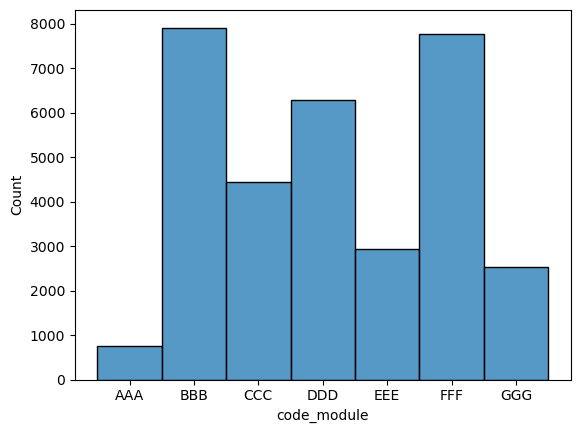

In [7]:
sns.histplot(student_info['code_module'])

### Replace '?' from student assessment 

In [9]:
student_assess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id_assessment   173912 non-null  int64 
 1   id_student      173912 non-null  int64 
 2   date_submitted  173912 non-null  int64 
 3   is_banked       173912 non-null  int64 
 4   score           173912 non-null  object
dtypes: int64(4), object(1)
memory usage: 6.6+ MB


In [10]:
student_assess.score.unique()

array(['78', '70', '72', '69', '79', '71', '68', '73', '67', '83', '66',
       '59', '82', '60', '75', '74', '62', '63', '84', '80', '76', '85',
       '57', '81', '87', '77', '45', '65', '61', '52', '54', '51', '88',
       '58', '64', '55', '38', '91', '47', '89', '36', '86', '49', '53',
       '39', '?', '90', '50', '56', '30', '11', '40', '94', '48', '46',
       '25', '34', '42', '18', '37', '28', '33', '95', '35', '44', '41',
       '15', '0', '43', '93', '32', '92', '98', '24', '19', '27', '29',
       '20', '97', '23', '99', '100', '10', '5', '13', '26', '22', '8',
       '12', '16', '9', '96', '14', '21', '17', '31', '6', '1', '7', '4',
       '2', '3'], dtype=object)

In [11]:
student_assess=student_assess.drop(student_assess[student_assess['score']=='?'].index).reset_index(drop=True)

In [12]:
# Convert 'score' column to numeric type
student_assess['score'] = pd.to_numeric(student_assess['score'])

### The modules with the highest and lowest average score

In [14]:
assessment_scores = student_assess.merge(assessments, on='id_assessment')

In [15]:
assessment_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173739 entries, 0 to 173738
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_assessment      173739 non-null  int64  
 1   id_student         173739 non-null  int64  
 2   date_submitted     173739 non-null  int64  
 3   is_banked          173739 non-null  int64  
 4   score              173739 non-null  int64  
 5   code_module        173739 non-null  object 
 6   code_presentation  173739 non-null  object 
 7   assessment_type    173739 non-null  object 
 8   date               173739 non-null  object 
 9   weight             173739 non-null  float64
dtypes: float64(1), int64(5), object(4)
memory usage: 13.3+ MB


Text(0.5, 1.0, 'Score Distribution')

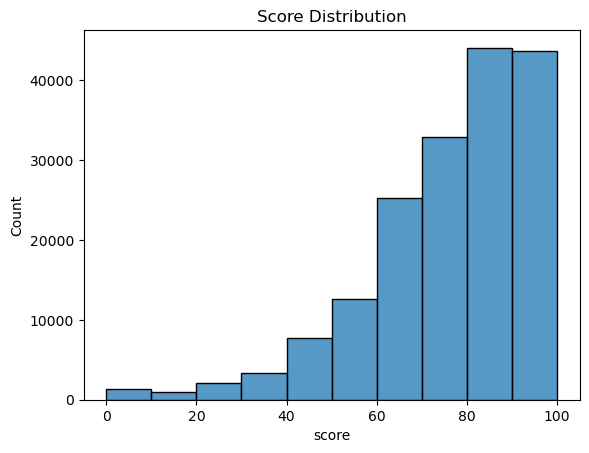

In [16]:
sns.histplot(assessment_scores['score'],bins=10)
plt.title('Score Distribution')

In [17]:
print(assessment_scores.groupby('code_module')['score'].mean().sort_values())

code_module
AAA    69.030515
DDD    70.090800
CCC    73.261398
BBB    76.706368
FFF    77.707590
GGG    79.700493
EEE    81.180066
Name: score, dtype: float64


### Top 5 modules with the most number of fails

In [19]:
student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              32593 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [20]:
student_info['is_fail'] = student_info['final_result'].apply(lambda x: 1 if x == 'Fail' else 0)
fail_count_per_module = (
    student_info.groupby('code_module')['is_fail'].sum()
    .sort_values(ascending=False)
    .reset_index()
)
student_info = student_info.drop(columns=['is_fail']).reset_index(drop=True)
fail_count_per_module

,code_module,is_fail
0,BBB,1767
1,FFF,1711
2,DDD,1412
3,CCC,781
4,GGG,728
5,EEE,562
6,AAA,91


### Age distribution

In [22]:
age_distribution = student_info['age_band'].value_counts()
print(age_distribution)

age_band
0-35     22944
35-55     9433
55<=       216
Name: count, dtype: int64


Text(0, 0.5, 'Number of Students')

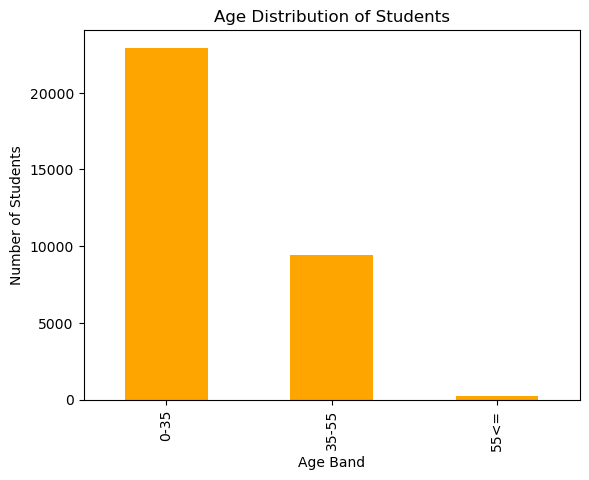

In [23]:
plt.subplot(1, 1, 1)
age_distribution.plot(kind='bar', color='orange')
plt.title('Age Distribution of Students')
plt.xlabel('Age Band')
plt.ylabel('Number of Students')

### Weekly activity patterns of the students' interaction with the VLE

In [25]:
student_vle['week'] = student_vle['date'] // 7  + 1
weekly_activity = student_vle.groupby('week')['sum_click'].sum()

Text(0, 0.5, 'Total Clicks')

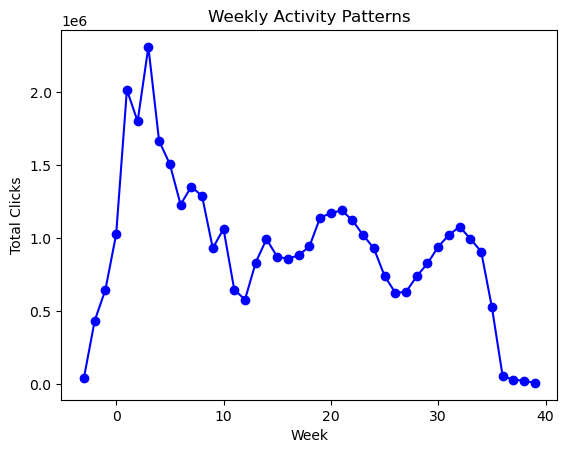

In [26]:
plt.subplot(1, 1, 1)
plt.plot(weekly_activity, marker='o', color='blue')
plt.title('Weekly Activity Patterns')
plt.xlabel('Week')
plt.ylabel('Total Clicks')

### Calculate sum total of weights for modules for each enrolled student

In [28]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               206 non-null    object 
 5   weight             206 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 9.8+ KB


In [29]:
#Drop assessments with no students taking those exams
to_be_drop=[]
for id in assessments['id_assessment'].unique():
    if len(student_assess[(student_assess['id_assessment']==id)]) == 0:
        to_be_drop.append(id)
to_be_drop

[1757,
 1763,
 14990,
 15002,
 15014,
 15025,
 40087,
 40088,
 30713,
 30718,
 30723,
 34872,
 34885,
 34898,
 34911,
 37424,
 37434,
 37444]

In [30]:
assessments = assessments[~assessments['id_assessment'].isin(to_be_drop)].reset_index(drop=True)

In [31]:
total_weights = assessments.groupby(['code_module', 'code_presentation'])['weight'].sum().reset_index()
total_weights.rename(columns={'weight': 'total_weight'}, inplace=True)
total_weights

,code_module,code_presentation,total_weight
0,AAA,2013J,100.0
1,AAA,2014J,100.0
2,BBB,2013B,100.0
3,BBB,2013J,100.0
4,BBB,2014B,100.0
5,BBB,2014J,100.0
6,CCC,2014B,200.0
7,CCC,2014J,200.0
8,DDD,2013B,200.0
9,DDD,2013J,200.0


In [32]:
assessment_scores['weighted_score'] = assessment_scores['score'] * (assessment_scores['weight'] / 100)

In [33]:
aggregated_weighted_scores = assessment_scores.groupby(
    ['code_module', 'code_presentation', 'id_student']
)['weighted_score'].sum().reset_index()

### Aggregate percentage for the student per module per code presentation (Data wrangling to prepare a good dataset for analysis)

In [35]:
aggregated_weighted_scores = aggregated_weighted_scores.merge(total_weights, on=['code_module', 'code_presentation'])

In [36]:
aggregated_weighted_scores['aggregated_weighted_score'] = (
    (aggregated_weighted_scores['weighted_score'] / aggregated_weighted_scores['total_weight']) * 100
)

In [37]:
aggregated_weighted_scores = aggregated_weighted_scores.drop(columns=['weighted_score', 'total_weight'])

In [38]:
aggregated_weighted_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25820 entries, 0 to 25819
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   code_module                25820 non-null  object 
 1   code_presentation          25820 non-null  object 
 2   id_student                 25820 non-null  int64  
 3   aggregated_weighted_score  23711 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 807.0+ KB


The null values are for students with module 'GGG' who have 0 weightage for their assessments

In [40]:
aggregated_weighted_scores = aggregated_weighted_scores[aggregated_weighted_scores['aggregated_weighted_score'].notna()].reset_index(drop=True)

In [41]:
student_info = student_info.merge(aggregated_weighted_scores, on=['id_student','code_module','code_presentation'])

In [42]:
student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23711 entries, 0 to 23710
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   code_module                23711 non-null  object 
 1   code_presentation          23711 non-null  object 
 2   id_student                 23711 non-null  int64  
 3   gender                     23711 non-null  object 
 4   region                     23711 non-null  object 
 5   highest_education          23711 non-null  object 
 6   imd_band                   23711 non-null  object 
 7   age_band                   23711 non-null  object 
 8   num_of_prev_attempts       23711 non-null  int64  
 9   studied_credits            23711 non-null  int64  
 10  disability                 23711 non-null  object 
 11  final_result               23711 non-null  object 
 12  aggregated_weighted_score  23711 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usag

In [43]:
vle_interaction = student_vle.groupby(['id_student', 'code_presentation', 'code_module'])['sum_click'].sum().reset_index()
interaction_scores = vle_interaction.merge(student_info, on=['id_student', 'code_presentation', 'code_module'])
interaction_scores

,id_student,code_presentation,code_module,sum_click,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,aggregated_weighted_score
0,6516,2014J,AAA,2791,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,63.500
1,8462,2013J,DDD,646,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn,17.450
2,8462,2014J,DDD,10,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn,21.500
3,11391,2013J,AAA,934,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,82.400
4,23629,2013B,BBB,161,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,Fail,16.690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23659,2698257,2013J,AAA,758,M,East Midlands Region,Lower Than A Level,60-70%,0-35,0,120,N,Pass,69.400
23660,2698535,2013J,EEE,3455,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,Pass,53.440
23661,2698535,2014B,CCC,786,M,Wales,Lower Than A Level,50-60%,0-35,0,60,N,Withdrawn,4.685
23662,2698577,2014J,BBB,717,F,Wales,Lower Than A Level,50-60%,35-55,0,60,N,Fail,55.800


### We will use new_df dataset now to do statistical modelling

In [45]:
new_df=interaction_scores[interaction_scores['aggregated_weighted_score']>0].reset_index(drop=True)

In [46]:
new_df[new_df['final_result']=='Pass'].aggregated_weighted_score.describe()

count    11238.000000
mean        69.778081
std         13.085447
min          0.800000
25%         60.865625
50%         71.250000
75%         79.877500
max         98.680000
Name: aggregated_weighted_score, dtype: float64

In [47]:
new_df[new_df['final_result']=='Fail'].aggregated_weighted_score.describe()

count    5156.000000
mean       29.155695
std        21.327294
min         0.100000
25%        10.500000
50%        24.000000
75%        45.207500
max        94.160000
Name: aggregated_weighted_score, dtype: float64

In [48]:
new_df[new_df['final_result']=='Withdrawn'].aggregated_weighted_score.describe()

count    4368.000000
mean       14.177153
std        14.011901
min         0.090000
25%         3.930000
50%        10.250000
75%        18.942500
max        90.960000
Name: aggregated_weighted_score, dtype: float64

In [49]:
new_df[new_df['final_result']=='Distinction'].aggregated_weighted_score.describe()

count    2628.000000
mean       86.807971
std         8.602155
min        45.070000
25%        84.115000
50%        88.440000
75%        92.500000
max       100.000000
Name: aggregated_weighted_score, dtype: float64

In [50]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23390 entries, 0 to 23389
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_student                 23390 non-null  int64  
 1   code_presentation          23390 non-null  object 
 2   code_module                23390 non-null  object 
 3   sum_click                  23390 non-null  int64  
 4   gender                     23390 non-null  object 
 5   region                     23390 non-null  object 
 6   highest_education          23390 non-null  object 
 7   imd_band                   23390 non-null  object 
 8   age_band                   23390 non-null  object 
 9   num_of_prev_attempts       23390 non-null  int64  
 10  studied_credits            23390 non-null  int64  
 11  disability                 23390 non-null  object 
 12  final_result               23390 non-null  object 
 13  aggregated_weighted_score  23390 non-null  flo

<Axes: xlabel='aggregated_weighted_score', ylabel='Count'>

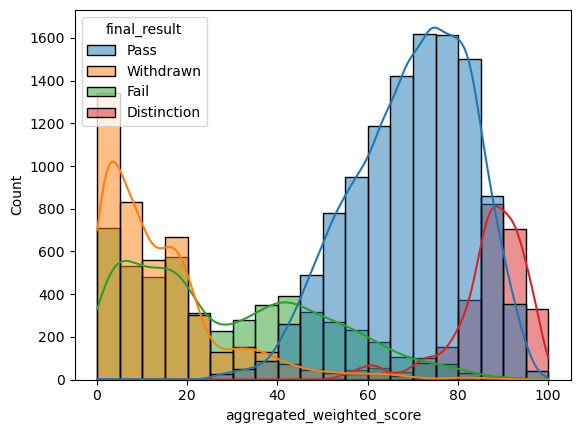

In [51]:
sns.histplot(data=new_df, x="aggregated_weighted_score", hue="final_result", kde=True, bins=20)

### Hypothesis Testing to check if VLE interaction is improving the scores

In [53]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(new_df['sum_click'], new_df['aggregated_weighted_score'])
print(f"Pearson Correlation: {correlation}, P-value: {p_value}")


Pearson Correlation: 0.47810550608192426, P-value: 0.0


### Chi - square test to check if demographics and course details is statistically significant on final_result 

In [55]:
from scipy.stats import chi2_contingency
from scipy.stats.contingency import crosstab

def chi2test(df,category1,category2):
    print(f'{category1} vs {category2}')
    
    table = crosstab(df[category1],df[category2])
    res = chi2_contingency(table.count)
    print(f'P- value: - {res.pvalue}')

for col in new_df.select_dtypes(include='object').columns:
    if col != 'final_result':
        chi2test(new_df,col,'final_result')

code_presentation vs final_result
P- value: - 1.6479123482986012e-54
code_module vs final_result
P- value: - 3.5994056026908175e-201
gender vs final_result
P- value: - 0.00026019148640578154
region vs final_result
P- value: - 3.63409291792211e-27
highest_education vs final_result
P- value: - 5.783871647708224e-160
imd_band vs final_result
P- value: - 7.556392355315622e-99
age_band vs final_result
P- value: - 5.0420930904613e-32
disability vs final_result
P- value: - 3.8152384111056804e-34


### Sum clicks vs Aggregated Weighted Score per module per code_presentation

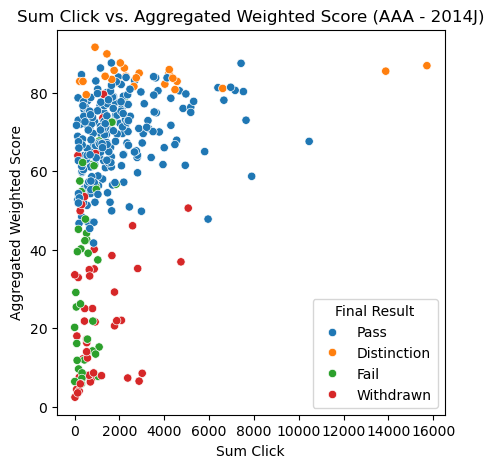

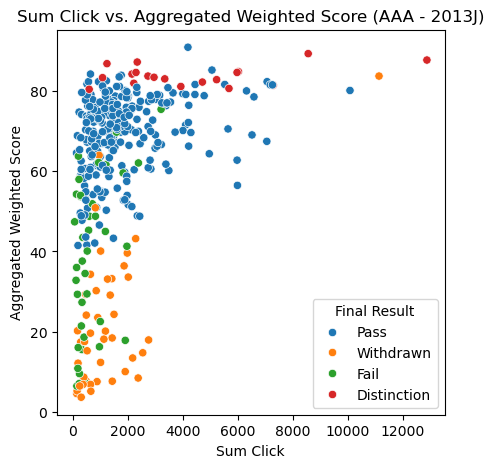

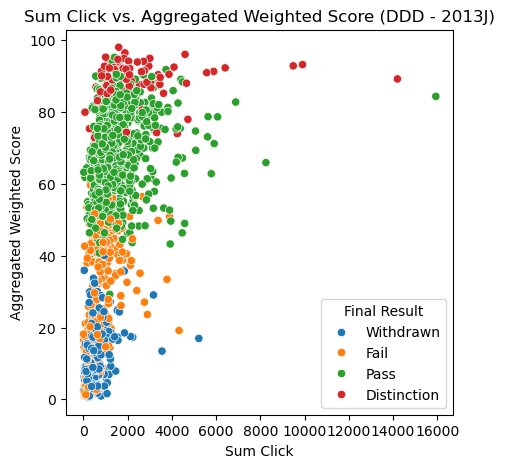

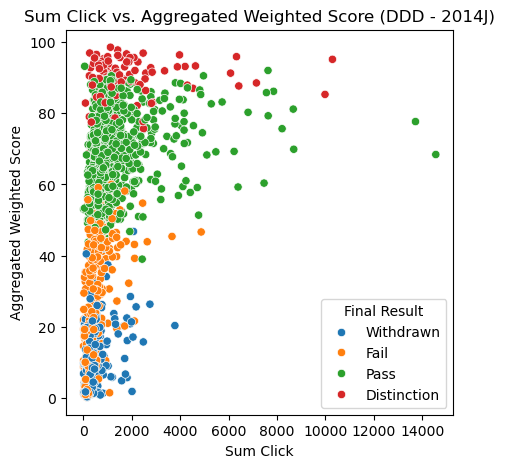

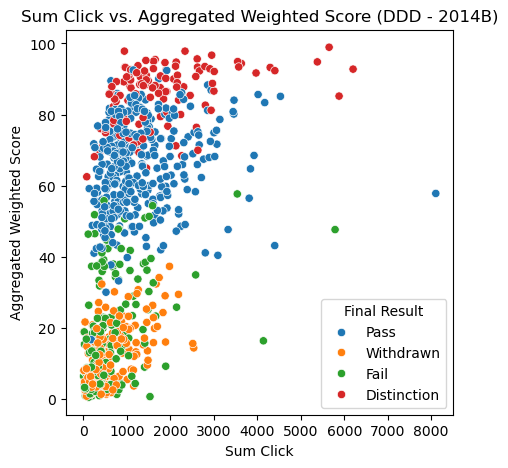

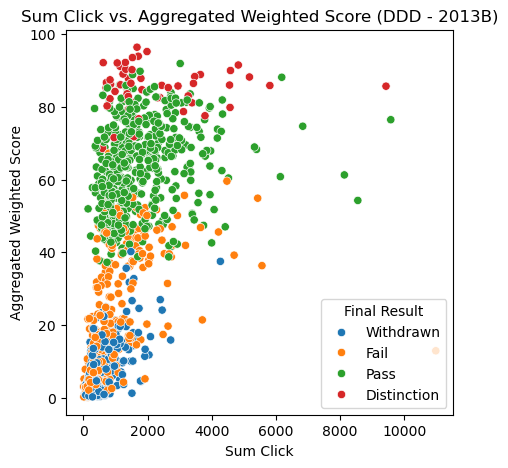

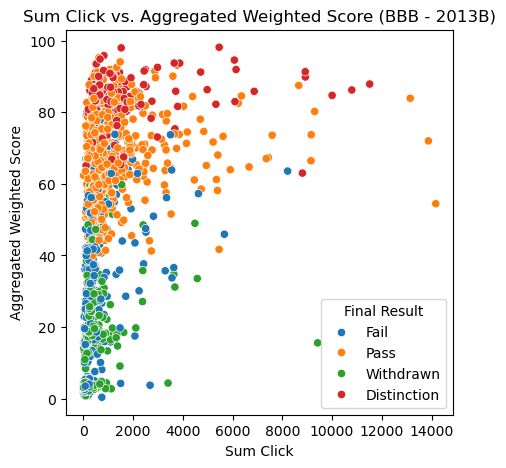

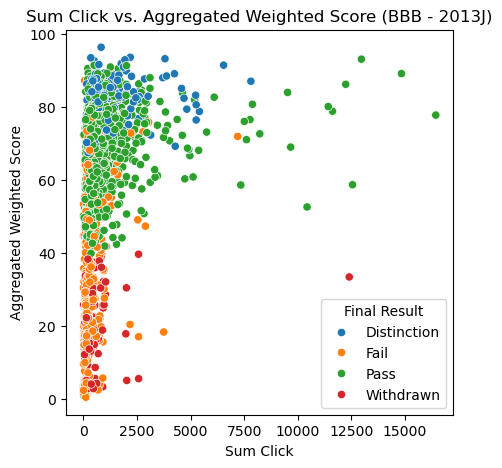

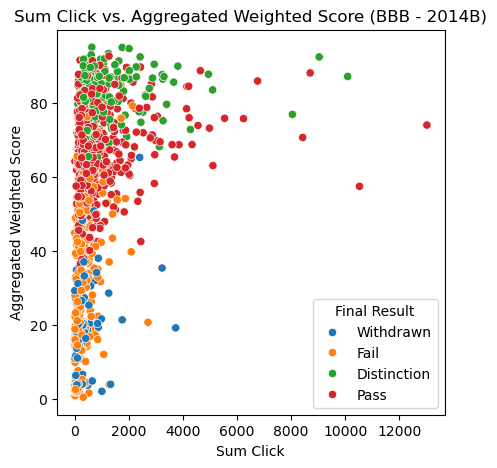

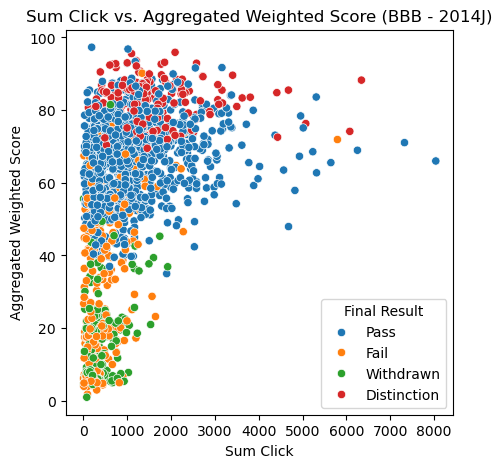

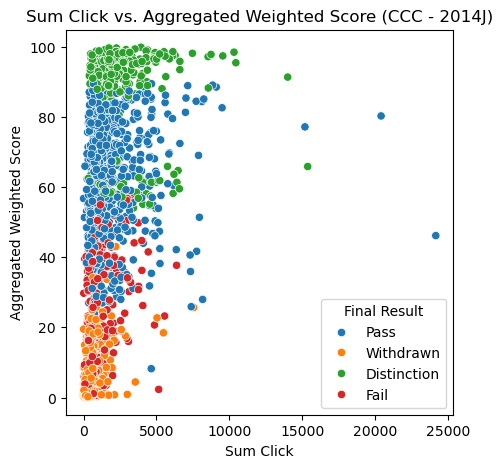

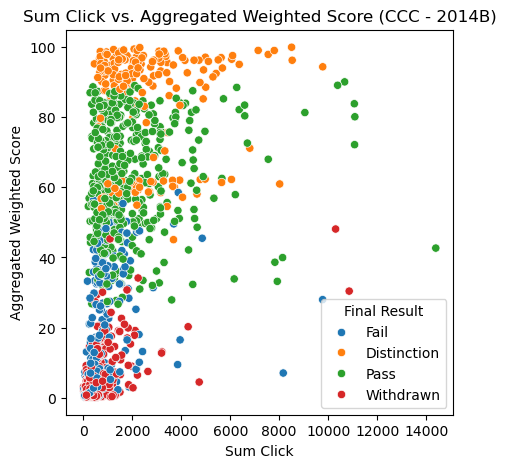

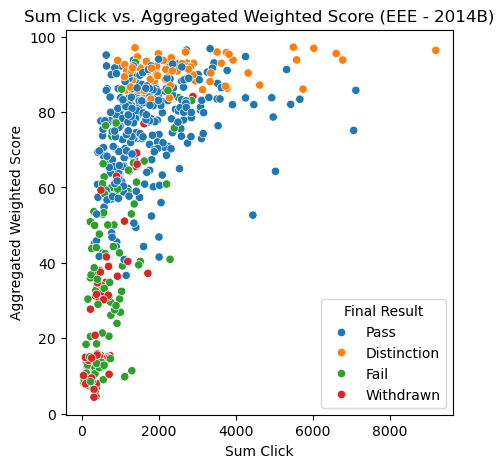

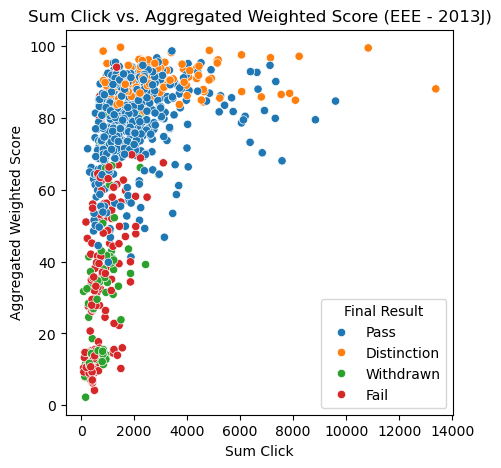

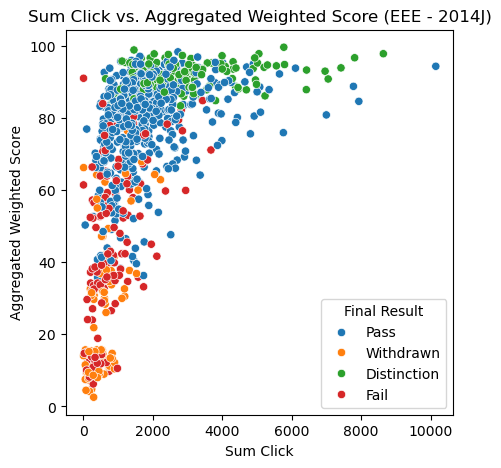

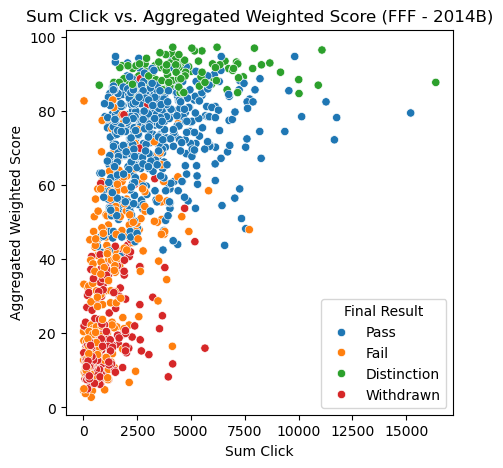

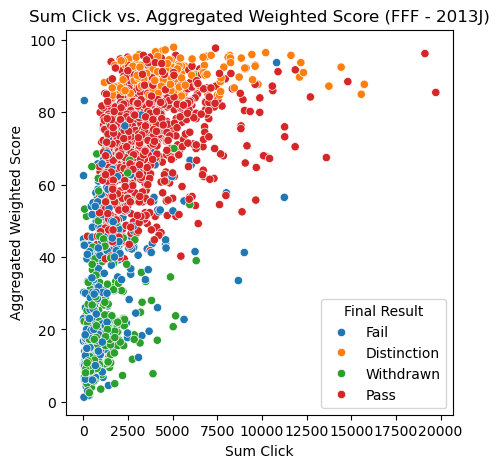

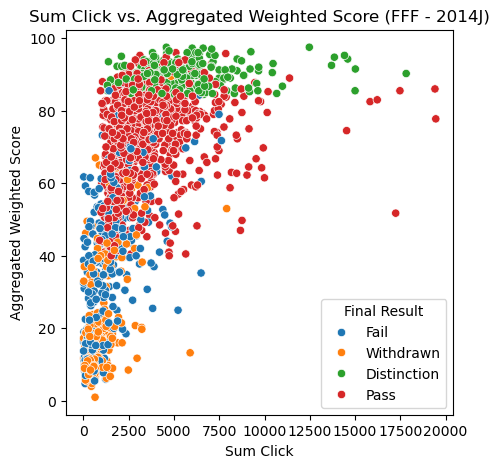

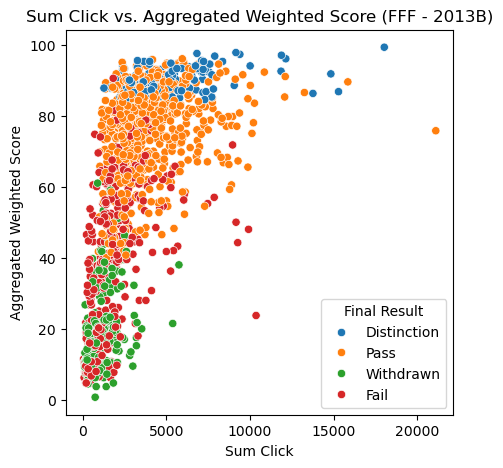

In [57]:
for module in new_df['code_module'].unique():
    module_data = new_df[new_df['code_module'] == module]
    for presentation in module_data['code_presentation'].unique():
        presentation_data = module_data[module_data['code_presentation'] == presentation]
        
        # Create scatter plot
        plt.figure(figsize=(5, 5))
        sns.scatterplot(
            x=presentation_data['sum_click'],
            y=presentation_data['aggregated_weighted_score'],
            hue=presentation_data['final_result']
        )
        plt.xlabel('Sum Click')
        plt.ylabel('Aggregated Weighted Score')
        plt.title(f'Sum Click vs. Aggregated Weighted Score ({module} - {presentation})')
        plt.legend(title='Final Result')
        plt.show()

### Module - wise dataset preparation 

In [59]:
student_module_AAA_data = new_df[new_df.code_module == 'AAA'].reset_index(drop=True)
student_module_BBB_data = new_df[new_df.code_module == 'BBB'].reset_index(drop=True)
student_module_CCC_data = new_df[new_df.code_module == 'CCC'].reset_index(drop=True)
student_module_DDD_data = new_df[new_df.code_module == 'DDD'].reset_index(drop=True)
student_module_EEE_data = new_df[new_df.code_module == 'EEE'].reset_index(drop=True)
student_module_FFF_data = new_df[new_df.code_module == 'FFF'].reset_index(drop=True)

In [60]:
student_module_AAA_data = student_module_AAA_data.drop(columns=['id_student']).reset_index(drop=True)

### Create dummy variables for gender, age_band, disability

In [62]:
student_module_AAA_data_encoded = pd.get_dummies(student_module_AAA_data, columns=['age_band','disability','gender'], drop_first=True)
student_module_AAA_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   code_presentation          704 non-null    object 
 1   code_module                704 non-null    object 
 2   sum_click                  704 non-null    int64  
 3   region                     704 non-null    object 
 4   highest_education          704 non-null    object 
 5   imd_band                   704 non-null    object 
 6   num_of_prev_attempts       704 non-null    int64  
 7   studied_credits            704 non-null    int64  
 8   final_result               704 non-null    object 
 9   aggregated_weighted_score  704 non-null    float64
 10  age_band_35-55             704 non-null    bool   
 11  age_band_55<=              704 non-null    bool   
 12  disability_Y               704 non-null    bool   
 13  gender_M                   704 non-null    bool   

### Multicollinearity check module-wise and code_presentation wise using pearson correlation matrix

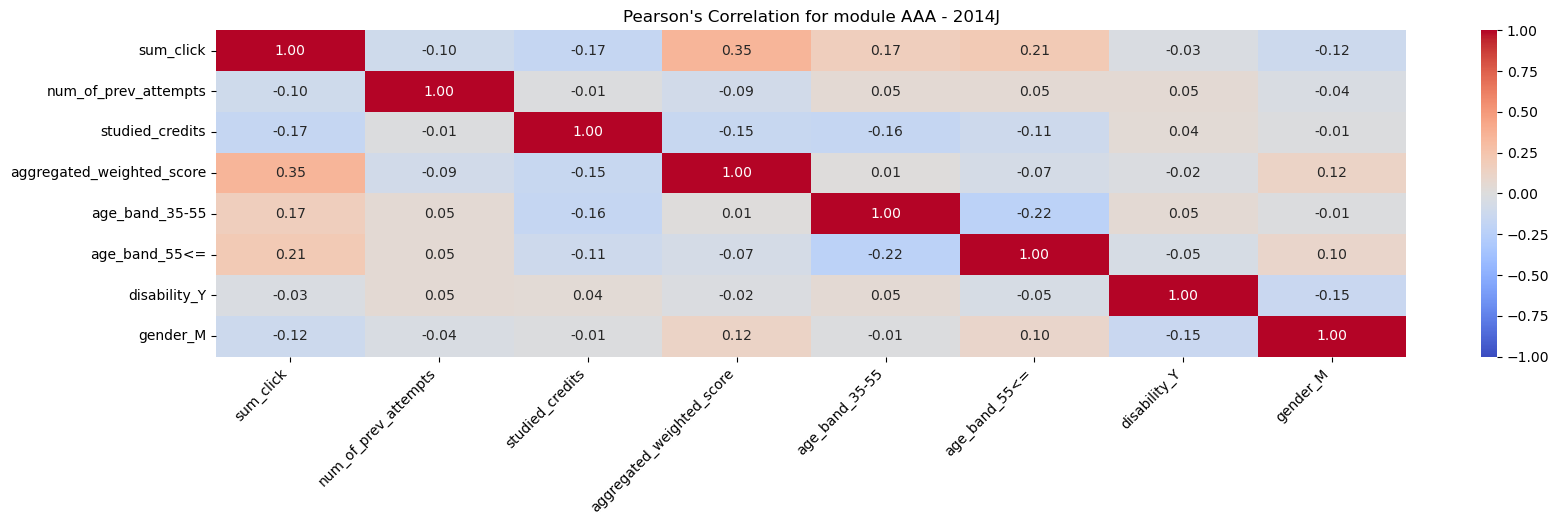

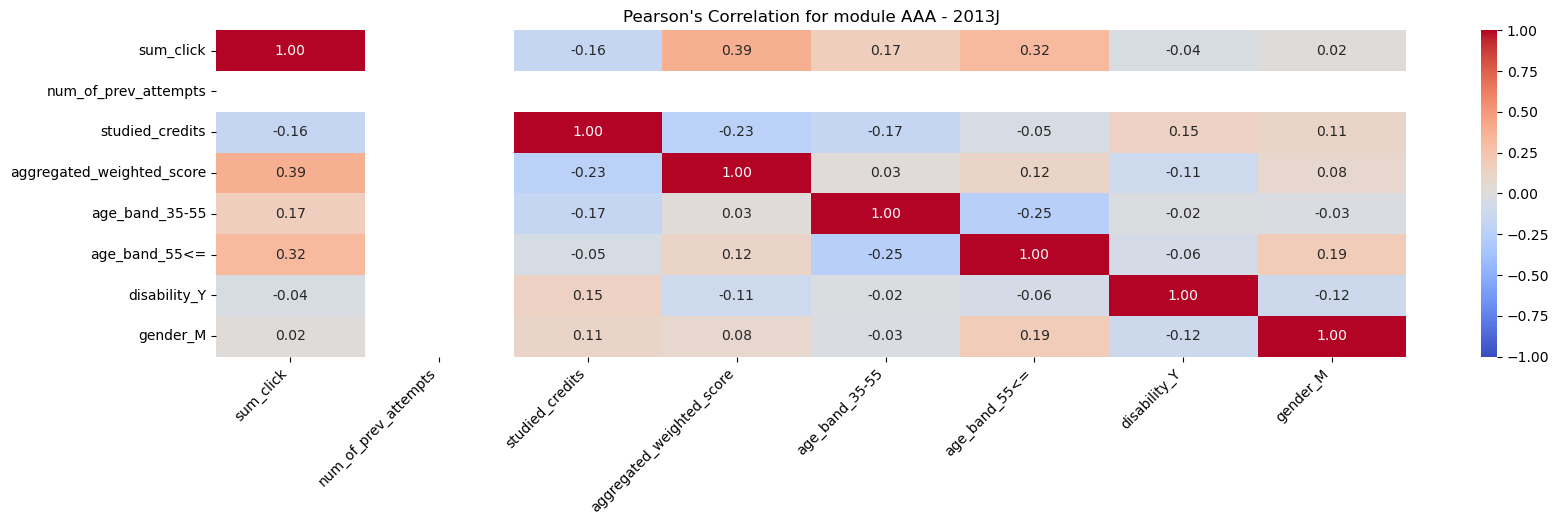

In [64]:
def plot_correlation_matrices(module_df,module_name):
    """
    Plots Pearson's correlation matrices for each code_presentation in the specified module.
    """
    
    for code_presentation in module_df['code_presentation'].unique():
        # Calculate the correlation matrix for the specific code_presentation
        p_oh_corr_matrix = module_df[module_df['code_presentation'] == code_presentation].corr(numeric_only=True)
        
        # Plot the correlation matrix
        fig, axes = plt.subplots(nrows=1, ncols=1)
        sns.heatmap(p_oh_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=axes, vmin=-1, vmax=1)
        
        # Set plot title and formatting
        axes.set_title(f"Pearson's Correlation for module {module_name} - {code_presentation}")
        fig.set_figwidth(fig.get_figwidth() * 3)
        fig.autofmt_xdate(rotation=45)
        
        # Display the plot
        plt.show()


plot_correlation_matrices(student_module_AAA_data_encoded,'AAA')

### Choosing predictors iteratively using Spearman's correlation

In [66]:
student_module_AAA_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   code_presentation          704 non-null    object 
 1   code_module                704 non-null    object 
 2   sum_click                  704 non-null    int64  
 3   region                     704 non-null    object 
 4   highest_education          704 non-null    object 
 5   imd_band                   704 non-null    object 
 6   num_of_prev_attempts       704 non-null    int64  
 7   studied_credits            704 non-null    int64  
 8   final_result               704 non-null    object 
 9   aggregated_weighted_score  704 non-null    float64
 10  age_band_35-55             704 non-null    bool   
 11  age_band_55<=              704 non-null    bool   
 12  disability_Y               704 non-null    bool   
 13  gender_M                   704 non-null    bool   

In [67]:
import numpy as np

def select_predictors_by_correlation(module_data, target_column="aggregated_weighted_score", threshold=0.2):
    """
    Select predictors based on Spearman correlation for each code presentation in a specific module.
    
    Parameters:
    module_name (str): The module name for which predictors are to be selected.
    target_column (str): The target column to correlate predictors with. Default is 'aggregated_weighted_score'.
    threshold (float): The correlation threshold for selecting predictors. Default is 0.2.
    
    Returns:
    dict: A dictionary with code_presentation as keys and lists of selected predictors as values.
    """
    # Initialize a dictionary to store results
    predictors_by_presentation = {}
    
    # Iterate over each code presentation
    for cp in module_data['code_presentation'].unique():
        # Filter data for the specific presentation
        presentation_data = module_data[module_data['code_presentation'] == cp]
        
        # Identify potential predictor columns and remove rest
        predictor_columns = [col for col in presentation_data.columns 
                             if col not in ["aggregated_weighted_score", 
                                            "region", "final_result", "imd_band", 
                                            "highest_education", "code_module", 
                                            "code_presentation"]]
        
        # Calculate the Spearman correlation matrix
        s_corr_matrix = presentation_data.corr(numeric_only=True, method="spearman")
        
        # Initialize a list for selected predictors
        selected_predictors = []
        
        while len(predictor_columns) > 0:
            # Find the maximum correlation with the target column
            max_rho = max([np.abs(s_corr_matrix[target_column][col]) for col in predictor_columns])
            if max_rho > threshold:
                # Identify the predictor with the maximum correlation
                new_idx = np.where(np.abs(s_corr_matrix[target_column][predictor_columns]) == max_rho)[0][0]
                selected_predictors.append(predictor_columns[new_idx])
                predictor_columns.pop(new_idx)
                
                # Remove highly correlated predictors
                idx_to_remove = []
                for idx, col in enumerate(predictor_columns):
                    rho = np.abs(s_corr_matrix[selected_predictors[-1]][col])
                    if rho > threshold:
                        idx_to_remove.append(idx)
                
                for idx in idx_to_remove[::-1]:
                    predictor_columns.pop(idx)
            else:
                break
        
        # Store the selected predictors for the current presentation
        predictors_by_presentation[cp] = selected_predictors
        
    return predictors_by_presentation
    
select_predictors_by_correlation(student_module_AAA_data_encoded)

{'2014J': ['sum_click'], '2013J': ['sum_click']}

### Statistical Modelling using OLS

In [69]:
model = sm.OLS.from_formula("aggregated_weighted_score ~ sum_click",data=student_module_AAA_data_encoded)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     aggregated_weighted_score   R-squared:                       0.135
Model:                                   OLS   Adj. R-squared:                  0.134
Method:                        Least Squares   F-statistic:                     109.5
Date:                       Mon, 06 Jan 2025   Prob (F-statistic):           6.46e-24
Time:                               12:26:18   Log-Likelihood:                -3123.7
No. Observations:                        704   AIC:                             6251.
Df Residuals:                            702   BIC:                             6260.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.6246      1.076     48.921      0.000      50.513      54.737
sum_click      0.0045      0.000     10.465      0.000       0.004       0.005
==============================================================================
Omnibus:                      100.618   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.455
Skew:                          -1.095   Prob(JB):                     7.07e-32
Kurtosis:                       3.306   Cond. No.                     3.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Statistical Modelling using OLS by removing the intercept term

In [71]:
model = sm.OLS.from_formula("aggregated_weighted_score ~ sum_click - 1",data=student_module_AAA_data_encoded)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     aggregated_weighted_score   R-squared (uncentered):                   0.554
Model:                                   OLS   Adj. R-squared (uncentered):              0.554
Method:                        Least Squares   F-statistic:                              874.9
Date:                       Mon, 06 Jan 2025   Prob (F-statistic):                   1.52e-125
Time:                               12:26:18   Log-Likelihood:                         -3645.9
No. Observations:                        704   AIC:                                      7294.
Df Residuals:                            703   BIC:                                      7298.
Df Model:                                  1                                                  
Covariance Type:                   nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sum_click      0.0190      0.001     29.580      0.000       0.018       0.020
==============================================================================
Omnibus:                      338.192   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2358.453
Skew:                          -2.046   Prob(JB):                         0.00
Kurtosis:                      10.978   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Prediction plot

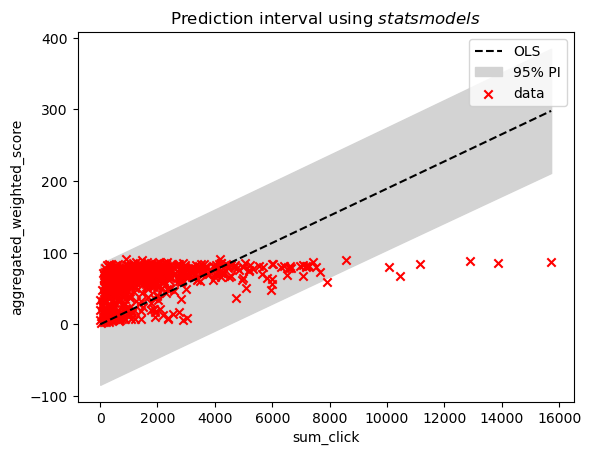

In [73]:
def produce_prediction_plot(df, x_var, y_var):
    pred_mean = result.fittedvalues
    pred_ols = result.get_prediction()
    pred_lb = pred_ols.summary_frame(alpha=0.05)["obs_ci_lower"]
    pred_ub = pred_ols.summary_frame(alpha=0.05)["obs_ci_upper"]

    fig, ax = plt.subplots(nrows=1,ncols=1)

    x = df[x_var].sort_values(inplace=False)
    y = np.sort(pred_mean)
    lb = np.sort(pred_lb)
    ub = np.sort(pred_ub)

    ax.plot(x, y, ls="--", color="k", label="OLS")
    ax.fill_between(x,lb,ub,color="lightgray",label="95% PI")
    ax.scatter(df[x_var], df[y_var], marker="x", color="r", label="data")
    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)
    ax.set_title(r"Prediction interval using $statsmodels$")
    _ = ax.legend(loc="best")
    
    return pred_mean, pred_ols 

pred_mean, _ = produce_prediction_plot(student_module_AAA_data_encoded, "sum_click","aggregated_weighted_score")

### Residual Plot 

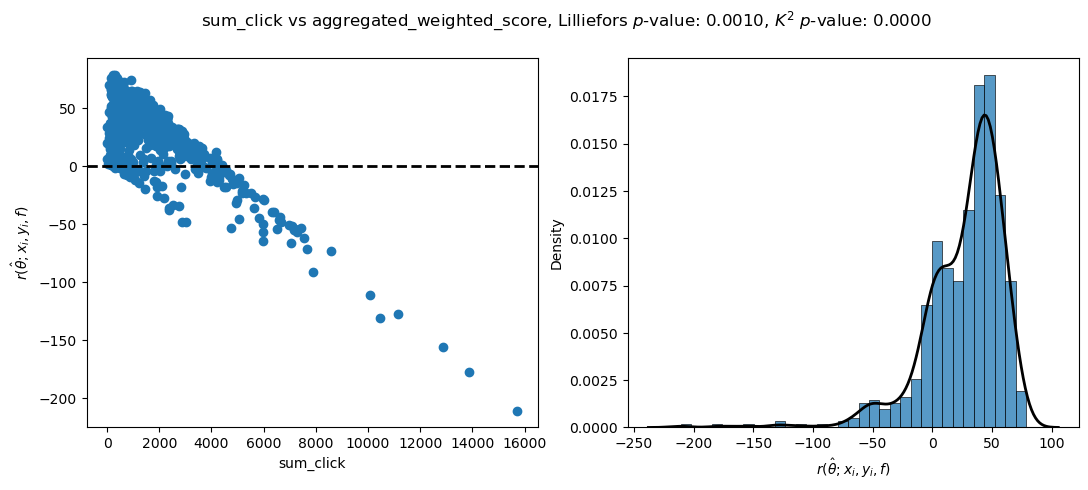

In [75]:
def produce_residual_plot(df, x_var, y_var, pred_mean):
    residual = df[y_var] - pred_mean 

    fig, axes = plt.subplots(nrows=1,ncols=2)

    axes[0].scatter(df[x_var], residual)
    axes[0].axhline(0.0,lw=2,ls="--",color="k")
    axes[0].set_xlabel(x_var)
    axes[0].set_ylabel(r"$r(\hat{\theta}; x_i,y_i,f)$")

    sns.histplot(residual,ax=axes[1], stat="density")
    sns.kdeplot(residual,lw=2,color="k",ax=axes[1])
    axes[1].set_xlabel(r"$r(\hat{\theta}; x_i,y_i,f)$")

    _, l_p_value = lilliefors(residual, dist="norm")
    _, k_p_value = normaltest(residual)

    fig.suptitle(f"{x_var} vs {y_var}, Lilliefors $p$-value: {l_p_value:.4f}, $K^2$ $p$-value: {k_p_value:.4f}")
    fig.set_figwidth(fig.get_figwidth() * 2)
    
    return residual
    
_ = produce_residual_plot(student_module_AAA_data_encoded, "sum_click","aggregated_weighted_score", pred_mean)

### Feature Selection using RFE along with score

In [77]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


def feature_selection(data, target_classification, target_regression, drop_columns_class, drop_columns_reg, test_size=0.2, random_state=42):
    """
    Perform feature selection using Recursive Feature Elimination (RFE) for Logistic and Linear Regression.

    Parameters:
    - data: DataFrame, input data.
    - target_classification: str, target column name for classification.
    - target_regression: str, target column name for regression.
    - drop_columns_class: list, columns to drop for classification.
    - drop_columns_reg: list, columns to drop for regression.
    - test_size: float, test size for train/test split.
    - random_state: int, random state for reproducibility.

    Returns:
    - None, prints feature selection results.
    """
    # Separate features and target for classification
    X_classification = data.drop(columns=drop_columns_class)
    y_classification = data[target_classification]

    # Separate features and target for regression
    X_regression = data.drop(columns=drop_columns_reg)
    y_regression = data[target_regression]

    # Split data into train/test
    X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(
        X_classification, y_classification, test_size=test_size, random_state=random_state
    )
    X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
        X_regression, y_regression, test_size=test_size, random_state=random_state
    )

    # Logistic Regression with RFE
    print("Feature selection for Logistic Regression")
    log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
    for nf in range(1, len(X_classification.columns) + 1):
        rfe_logistic = RFE(estimator=log_reg, n_features_to_select=nf).fit(X_class_train, y_class_train)
        print(f"score: {rfe_logistic.score(X_class_train, y_class_train)}, features: {rfe_logistic.get_feature_names_out()}")

    print("\nFeature selection for Linear Regression")
    lin_reg = LinearRegression()
    for nf in range(1, len(X_regression.columns) + 1):
        rfe_linear = RFE(estimator=lin_reg, n_features_to_select=nf).fit(X_reg_train, y_reg_train)
        print(f"score: {rfe_linear.score(X_reg_train, y_reg_train)}, features: {rfe_linear.get_feature_names_out()}")

# Example usage:
df = student_module_AAA_data_encoded.copy()
feature_selection(
    data=df,
    target_classification='final_result',
    target_regression='aggregated_weighted_score',
    drop_columns_class=['final_result', 'code_module', 'code_presentation', 'aggregated_weighted_score', 'imd_band', 'region', 'highest_education'],
    drop_columns_reg=['aggregated_weighted_score', 'final_result', 'code_module', 'code_presentation', 'imd_band', 'region', 'highest_education']
)

Feature selection for Logistic Regression
score: 0.6785079928952042, features: ['disability_Y']
score: 0.6785079928952042, features: ['age_band_55<=' 'disability_Y']
score: 0.6785079928952042, features: ['age_band_35-55' 'age_band_55<=' 'disability_Y']
score: 0.6785079928952042, features: ['num_of_prev_attempts' 'age_band_35-55' 'age_band_55<=' 'disability_Y']
score: 0.6785079928952042, features: ['num_of_prev_attempts' 'age_band_35-55' 'age_band_55<=' 'disability_Y'
 'gender_M']
score: 0.6767317939609236, features: ['num_of_prev_attempts' 'studied_credits' 'age_band_35-55' 'age_band_55<='
 'disability_Y' 'gender_M']
score: 0.6838365896980462, features: ['sum_click' 'num_of_prev_attempts' 'studied_credits' 'age_band_35-55'
 'age_band_55<=' 'disability_Y' 'gender_M']

Feature selection for Linear Regression
score: 0.008532445721187165, features: ['disability_Y']
score: 0.013928416009693523, features: ['disability_Y' 'gender_M']
score: 0.016433457994426304, features: ['age_band_35-55' 'd

### OLS fitting after feature selection

In [79]:
df.columns = df.columns.str.replace(r'[\-<=]', '_', regex=True)
model = sm.OLS.from_formula("aggregated_weighted_score ~ sum_click + num_of_prev_attempts + studied_credits + age_band_35_55 + age_band_55__ + disability_Y + gender_M",data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     aggregated_weighted_score   R-squared:                       0.189
Model:                                   OLS   Adj. R-squared:                  0.181
Method:                        Least Squares   F-statistic:                     23.17
Date:                       Mon, 06 Jan 2025   Prob (F-statistic):           2.43e-28
Time:                               12:26:19   Log-Likelihood:                -3101.0
No. Observations:                        704   AIC:                             6218.
Df Residuals:                            696   BIC:                             6254.
Df Model:                                  7                                         
Covariance Type:                   nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 57.8925      2.238     25.870      0.000      53.499      62.286
age_band_35_55[T.True]    -4.3580      1.624     -2.683      0.007      -7.547      -1.169
age_band_55__[T.True]    -11.8508      3.519     -3.367      0.001     -18.761      -4.941
disability_Y[T.True]      -2.2199      3.465     -0.641      0.522      -9.023       4.584
gender_M[T.True]           6.5609      1.572      4.173      0.000       3.474       9.648
sum_click                  0.0048      0.000     10.662      0.000       0.004       0.006
num_of_prev_attempts      -2.8509      3.437     -0.830      0.407      -9.599       3.897
studied_credits           -0.0815      0.018     -4.611      0.000      -0.116      -0.047
==============================================================================
Omnibus:                       90.658   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.244
Skew:                          -1.014   Prob(JB):                     1.05e-27
Kurtosis:                       3.345   Cond. No.                     1.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Encoding Final result for logistic regression prediction

In [81]:
df = pd.get_dummies(df, columns=["final_result"],dtype=float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   code_presentation          704 non-null    object 
 1   code_module                704 non-null    object 
 2   sum_click                  704 non-null    int64  
 3   region                     704 non-null    object 
 4   highest_education          704 non-null    object 
 5   imd_band                   704 non-null    object 
 6   num_of_prev_attempts       704 non-null    int64  
 7   studied_credits            704 non-null    int64  
 8   aggregated_weighted_score  704 non-null    float64
 9   age_band_35_55             704 non-null    bool   
 10  age_band_55__              704 non-null    bool   
 11  disability_Y               704 non-null    bool   
 12  gender_M                   704 non-null    bool   
 13  final_result_Distinction   704 non-null    float64

In [82]:
df=df.drop(columns=['final_result_Withdrawn'])

### Logistic Regression fit and Analysis

In [84]:
model = sm.Logit.from_formula("final_result_Pass ~ sum_click + num_of_prev_attempts + studied_credits + age_band_35_55 + age_band_55__ + disability_Y + gender_M",data=df)
res = model.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.603382
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:      final_result_Pass   No. Observations:                  704
Model:                          Logit   Df Residuals:                      696
Method:                           MLE   Df Model:                            7
Date:                Mon, 06 Jan 2025   Pseudo R-squ.:                 0.02496
Time:                        12:26:20   Log-Likelihood:                -424.78
converged:                       True   LL-Null:                       -435.65
Covariance Type:            nonrobust   LLR p-value:                  0.002808
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.0681      0.247      4.317      0.000       0.583      

In [85]:
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
X=df[['num_of_prev_attempts','studied_credits', 'age_band_35_55' , 'age_band_55__', 'disability_Y' , 'gender_M']]
y=df['final_result_Pass']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
clf = log_reg.fit(X_train, y_train)
print(clf.intercept_)
print(clf.coef_)

[1.02918765]
[[-0.07644956 -0.00495608  0.09058719 -0.58398968 -0.36127747  0.24428647]]


### Confusion Matrix for Pass vs Not Pass

Text(50.722222222222214, 0.5, 'True Values')

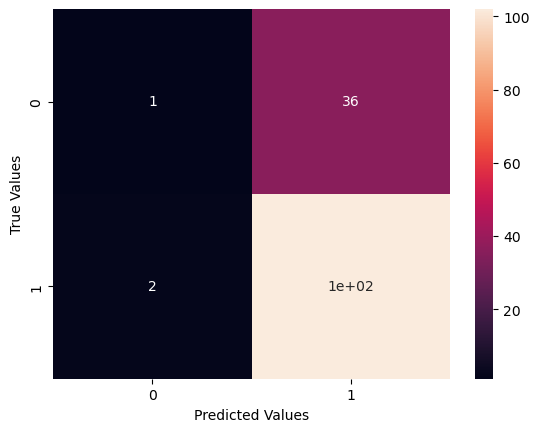

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report
yhat = clf.predict(X_test)

cm = confusion_matrix(y_test, yhat)
_ = sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')

### Accuracy, Precision, Recall and F1-score 

In [89]:
print(f"Accuracy = {accuracy_score(y_test, yhat)}")
print(f"Precision = {precision_score(y_test, yhat)}")
print(f"Recall = {recall_score(y_test, yhat)}")
print(f"F1-score = {f1_score(y_test, yhat)}")

Accuracy = 0.7304964539007093
Precision = 0.7391304347826086
Recall = 0.9807692307692307
F1-score = 0.8429752066115702


### Logistic Regression fit and Analysis with aggregated_weighted_score as a feature

R-square increases by a lot

In [91]:
model = sm.Logit.from_formula("final_result_Pass ~ sum_click + num_of_prev_attempts + studied_credits + age_band_35_55 + age_band_55__ + disability_Y + gender_M + aggregated_weighted_score",data=df)
res = model.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.426103
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:      final_result_Pass   No. Observations:                  704
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            8
Date:                Mon, 06 Jan 2025   Pseudo R-squ.:                  0.3114
Time:                        12:26:20   Log-Likelihood:                -299.98
converged:                       True   LL-Null:                       -435.65
Covariance Type:            nonrobust   LLR p-value:                 5.066e-54
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -3.1420      0.464     -6.775      0.000      -4.

### Decision Tree Regression

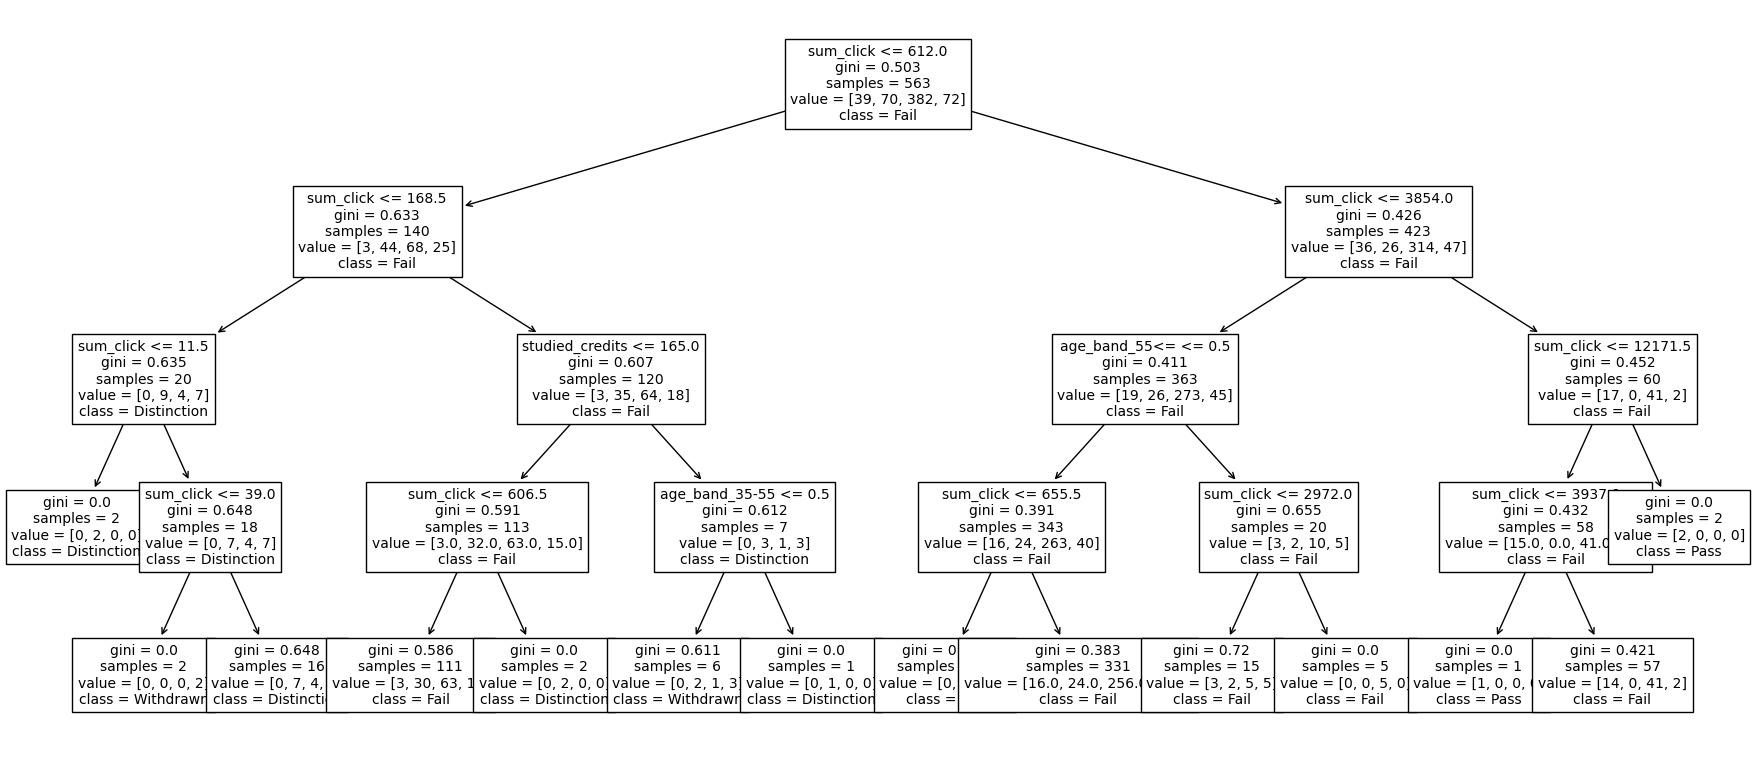

In [181]:
from sklearn import tree
from sklearn.metrics import confusion_matrix

def preprocess_data(data, target_col, drop_cols):
    """
    Preprocess the dataset: drop specified columns, one-hot encode categorical variables,
    and separate features and target.

    Parameters:
        data (pd.DataFrame): The input dataset.
        target_col (str): The target column name.
        drop_cols (list): List of column names to drop.

    Returns:
        X (pd.DataFrame): Features after preprocessing.
        y (pd.Series): Target variable.
    """
    X = data.drop(columns=drop_cols)
    y = data[target_col]
    X = pd.get_dummies(X, drop_first=True)
    return X, y

def train_decision_tree(X_train, y_train, max_depth=4):
    """
    Train a Decision Tree Classifier.

    Parameters:
        X_train (pd.DataFrame): Training features.
        y_train (pd.Series): Training target.
        max_depth (int): Maximum depth of the tree. Default is 4.

    Returns:
        model (DecisionTreeClassifier): Trained model.
    """
    model = tree.DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    return model

def plot_decision_tree(model, feature_names, class_names):
    """
    Plot the trained Decision Tree.

    Parameters:
        model (DecisionTreeClassifier): Trained model.
        feature_names (list): List of feature names.
        class_names (list): List of class names.
    """
    fig, ax = plt.subplots(nrows=1, ncols=1)
    tree.plot_tree(
        model,
        feature_names=feature_names,
        class_names=class_names,
        ax=ax,
        fontsize=10
    )
    fig.set_figheight(fig.get_figheight() * 2)
    fig.set_figwidth(fig.get_figwidth() * 3.5)
    plt.show()

def plot_confusion_matrix(y_true, y_pred, labels):
    """
    Plot the confusion matrix as a heatmap.

    Parameters:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        labels (list): List of label names.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

data = student_module_AAA_data.copy()

# Preprocess the data
target_column = 'final_result'
drop_columns = ['final_result', 'code_module', 'code_presentation', 'aggregated_weighted_score', 'imd_band','region','highest_education']
X, y = preprocess_data(data, target_column, drop_columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree
model = train_decision_tree(X_train, y_train, max_depth=4)

# Plot the Decision Tree
plot_decision_tree(model, feature_names=X_train.columns, class_names=[str(cls) for cls in y_train.unique()])


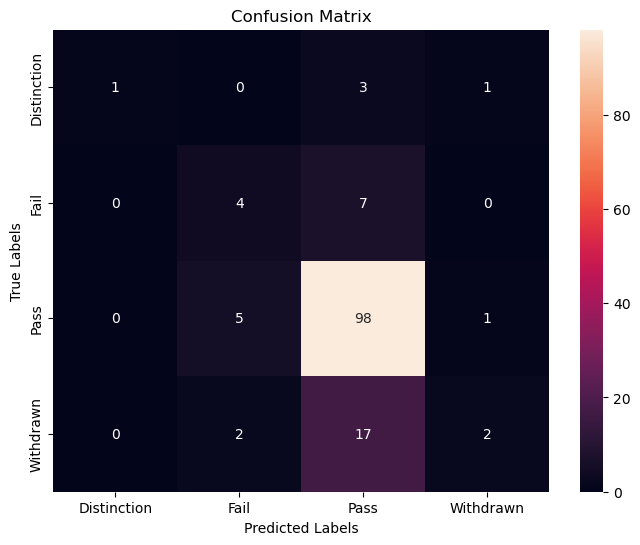

In [182]:
# Predict and plot confusion matrix
y_pred = model.predict(X_test)
plot_confusion_matrix(y_test, y_pred, labels=model.classes_)

In [185]:
accuracy_score(y_test,y_pred)

0.7446808510638298

In [187]:
print(classification_report(y_test,y_pred,target_names=model.classes_))

              precision    recall  f1-score   support

 Distinction       1.00      0.20      0.33         5
        Fail       0.36      0.36      0.36        11
        Pass       0.78      0.94      0.86       104
   Withdrawn       0.50      0.10      0.16        21

    accuracy                           0.74       141
   macro avg       0.66      0.40      0.43       141
weighted avg       0.72      0.74      0.70       141



### Finding out class with the least imbalance 

In [98]:
outcome_counts = new_df.groupby('code_module')['final_result'].value_counts().unstack()
print(outcome_counts)

final_result  Distinction  Fail  Pass  Withdrawn
code_module                                     
AAA                    44    81   486         93
BBB                   677  1358  3075        741
CCC                   498   662  1179       1030
DDD                   383  1190  2227       1127
EEE                   356   406  1293        239
FFF                   670  1459  2978       1138


'CCC' has the least imbalance. Let's consider all encoding all the demographics no

### Decision Tree classifier for module CCC using all the features for feature selection

In [101]:
data = student_module_CCC_data.copy()

# Preprocess the data
target_column = 'final_result'
drop_columns = ['final_result', 'code_module']
X, y = preprocess_data(data, target_column, drop_columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Train the Decision Tree
model = train_decision_tree(X_train, y_train, max_depth=4)


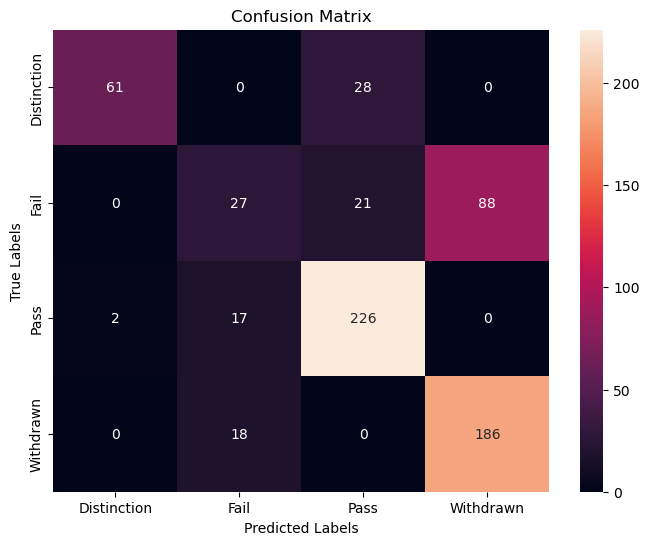

0.7418397626112759

In [102]:
y_pred = model.predict(X_test)
plot_confusion_matrix(y_test, y_pred, labels=model.classes_)
accuracy_score(y_test,y_pred)

In [103]:
print(classification_report(y_test,y_pred,target_names=model.classes_))

              precision    recall  f1-score   support

 Distinction       0.97      0.69      0.80        89
        Fail       0.44      0.20      0.27       136
        Pass       0.82      0.92      0.87       245
   Withdrawn       0.68      0.91      0.78       204

    accuracy                           0.74       674
   macro avg       0.73      0.68      0.68       674
weighted avg       0.72      0.74      0.71       674

